In [1]:
import numpy as np

In [3]:
time = np.arange(50)

In [5]:
trend = np.empty_like(time, dtype='float')
for t in time:
    if t < 10:
        trend[t] = t * 2.25
    elif t < 30:
        trend[t] = t * -0.5 + 25
    else:
        trend[t] = t * 1.25 - 28

In [6]:
import matplotlib.pyplot as plt

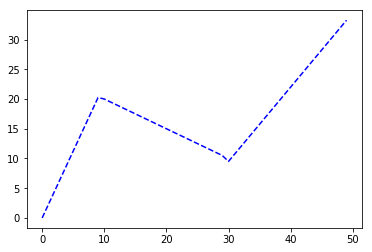

In [7]:
plt.plot(time, trend, 'b--')

In [8]:
seasonal = 10 * np.sin(time) * 10

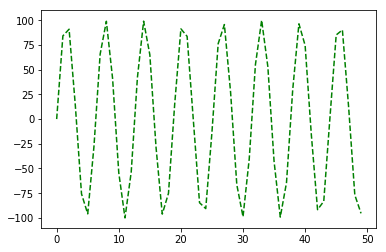

In [11]:
plt.plot(time, seasonal, 'g--')

In [14]:
np.random.seed(3) ### reproducible results
residual = np.random.normal(loc=0.0, scale=1, size=len(time))

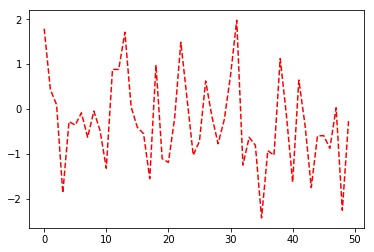

In [15]:
plt.plot(time, residual, 'r--')

방식 트랜드 반영 + 계절성 반영 + 잔차(오차) 반영

일반적으로 multicative 는 실제값이 %인경우에 주로 사용함

In [23]:
additive = trend + seasonal + residual
multiplicative = trend * seasonal + residual

In [18]:
multi = trend * seasonal

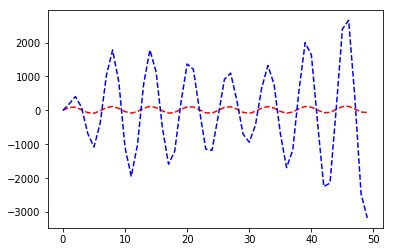

In [19]:
plt.plot(time, additive, 'r--')
plt.plot(time, multicative, 'b--')

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
ss_decomposition = seasonal_decompose(x=additive, 
                                      model='additive', 
                                      freq=6)
estimated_trend = ss_decomposition.trend
estimated_seasonal = ss_decomposition.seasonal
estimated_residual = ss_decomposition.resid

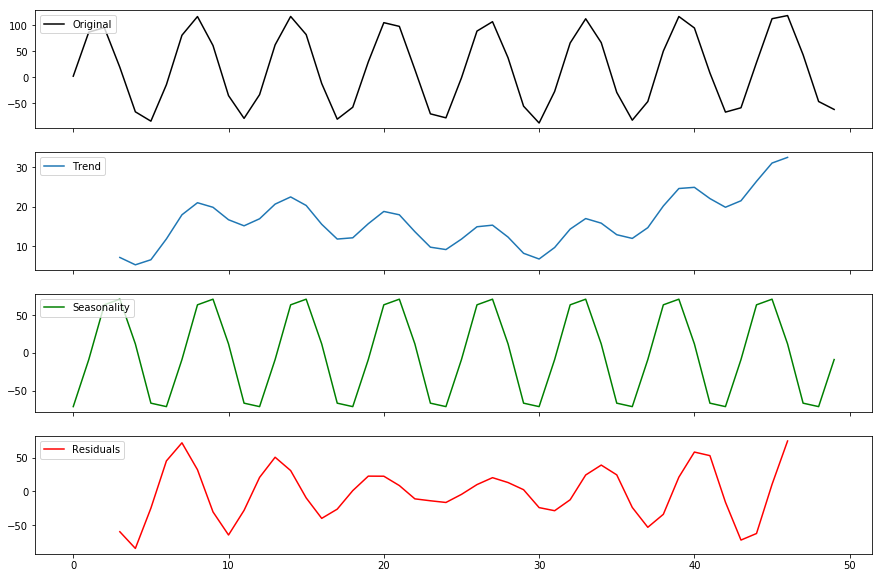

In [21]:
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(additive, 'k', label='Original')
axes[0].legend(loc='upper left');

axes[1].plot(estimated_trend, label='Trend')
axes[1].legend(loc='upper left');

axes[2].plot(estimated_seasonal, 'g', label='Seasonality')
axes[2].legend(loc='upper left');

axes[3].plot(estimated_residual, 'r', label='Residuals')
axes[3].legend(loc='upper left')

In [25]:
ss_decomposition = seasonal_decompose(x=multiplicative, 
                                      freq=6)
estimated_trend = ss_decomposition.trend
estimated_seasonal = ss_decomposition.seasonal
estimated_residual = ss_decomposition.resid


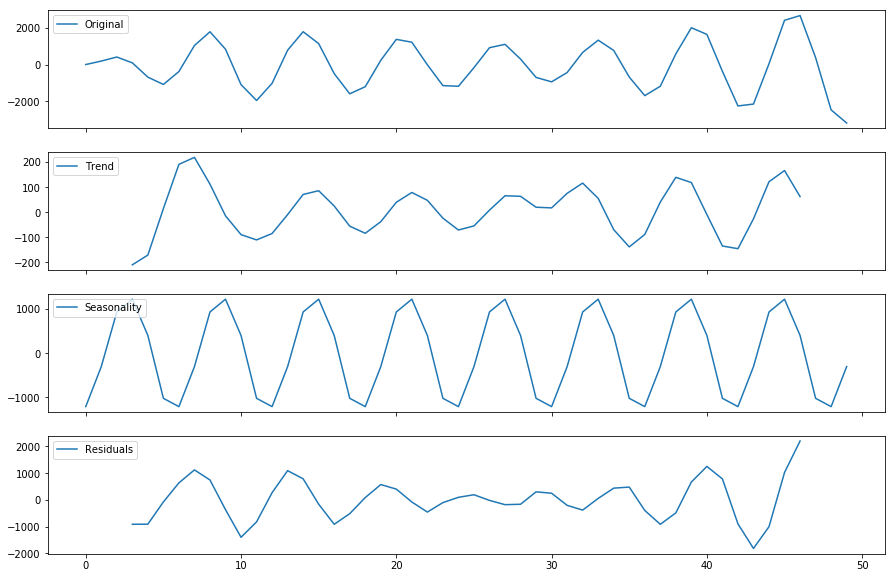

In [26]:
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(multiplicative, label='Original')
axes[0].legend(loc='upper left')

axes[1].plot(estimated_trend, label='Trend')
axes[1].legend(loc='upper left')

axes[2].plot(estimated_seasonal, label='Seasonality')
axes[2].legend(loc='upper left')

axes[3].plot(estimated_residual, label='Residuals')
axes[3].legend(loc='upper left')